### Описание задачи

## Разведочный анализ данных, реализация скриптов для подготовки выборок

Проведение разведочного анализа включает в себя такие подзадачи как:
- частотный анализ коллекции(например распределение количества слов в документах)
- выбор пространства признаков с обоснование данных признаков
- визуализация данных
- подсчет статистических параметров для коллекции с использованием выбранных признаков(например среднее, стандартное отклонение, квартили и тд)
- поиск выбросов и аномалий, их анализ, выбор методов детектирования аномалий и их обработки.
- корреляционный анализ(например, построенные парные диаграммы рассеяния различных признаков, их гистограммы распределения, корреляционные матрицы, проверка гипотезы о гомоскедастичности данных и подобных ей)
- выбор целевых переменных для задач классификации документов по темам на основе тегов и предсказания рейтинга документа.
- построение распределения и анализ целевых переменных

Для полноты анализа могут быть описаны различные преобразования данных и их анализ, применение PCA, анализ feature importance, поиск ложных корреляций.
После проведения каждого анализа следует фиксировать выводы о полученных результатах. 

Для сдачи необходимо представить ноутбуки в которых проведен соответствующий анализ и описаны выводы и рекомендации по работе с данной коллекцией.


## Разведочный анализ данных численных параметров малой коллекции 

- Рейтинг
- Количество комментарие
- Количество просмотров
- Длина поста

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = r'C:\Users\Public\Projects\python\Pikabu\InformationRetrieval\data\processed\dataset_hot.csv'
df = pd.read_csv(filename)

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'FileName', 'Title', 'Link', 'ArticleId',
       'Date', 'Views', 'Author', 'Tags', 'AmountComments', 'Rating', 'Text'],
      dtype='object')

### Предобработка

In [4]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
df_num = df[['Views','AmountComments','Rating']]
df_num['LenText'] = df['Text'].apply(lambda x: len(str(x)))
df_num.head()

,Views,AmountComments,Rating,LenText
0,502000,1205,14171.0,233
1,312000,350,7018.0,80
2,85100,58,913.0,1416
3,79700,38,892.0,6
4,100000,72,1698.0,3


### Статистические параметры коллекции

In [5]:
df_num.describe()

,Views,AmountComments,Rating,LenText
count,1492.000000,1492.000000,1491.000000,1492.000000
mean,126602.477212,183.167560,2245.721663,691.747989
std,97054.077159,241.591029,2493.963454,1545.113878
min,12000.000000,2.000000,141.000000,1.000000
25%,64275.000000,43.000000,636.000000,3.000000
50%,98050.000000,97.000000,1368.000000,91.000000
75%,148000.000000,218.000000,2725.000000,716.000000
max,644000.000000,2500.000000,14928.000000,21251.000000


## Частотный анализ коллекции и функции распределения

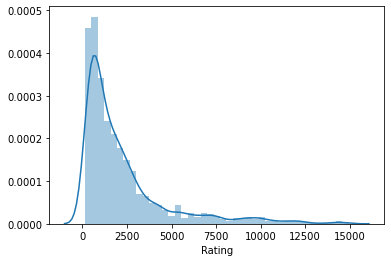

In [7]:
# Распределение рейтингов
sns_plot = sns.distplot(df_num['Rating'])
fig = sns_plot.get_figure()

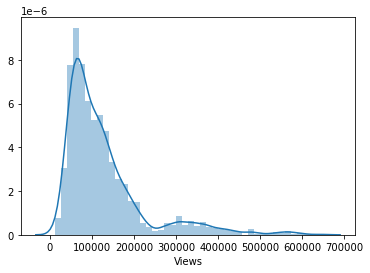

In [8]:
# Распределение просмотров
sns_plot = sns.distplot(df_num['Views'])
fig = sns_plot.get_figure()

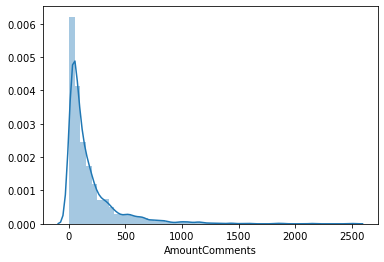

In [9]:
# Распределеие комментариев
sns_plot = sns.distplot(df_num['AmountComments'])
fig = sns_plot.get_figure()

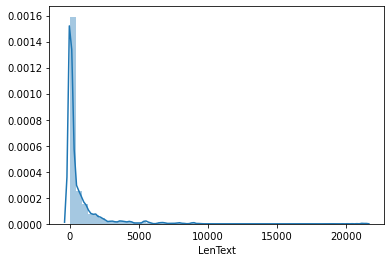

In [10]:
# Распределение длины публикаций
sns.distplot(df_num['LenText'])

In [12]:
# Процент постов длиннее 1000 знаков
# Соотношение 80 : 20 - короткие : длинные публикации

len(df_num[df_num['LenText'] > 1000]) / len(df_num)

0.19436997319034852

## Корреляционный анализ

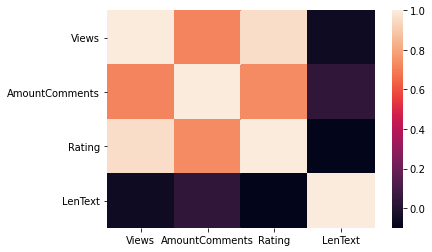

In [66]:
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix)

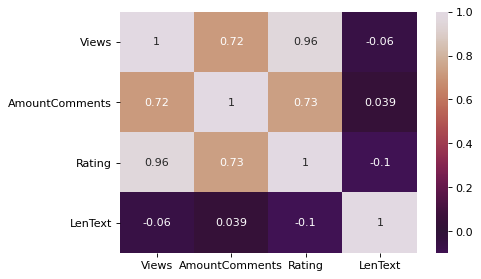

In [103]:
plt.figure(figsize=(6,4), dpi= 80)
sns.heatmap(df_num.corr(), cmap='twilight', center=0, annot=True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Визуализация данных

### Многомерная визуализация

In [43]:
# 3х-мерный график

import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=df_num['Rating'],
                    y=df_num['Views'],
                    z=df_num['AmountComments'],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Rating"),
                                yaxis=dict( title="Views"),
                                zaxis=dict(title="AmountComments")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot_hot_num.html"))


'3DPlot_num.html'

In [63]:
# 4х-мерный график
# 4 измерение отмечено яркостью цвета: чем темнее, тем меньше длина поста

markercolor = df_num['LenText']

#Make Plotly figure
fig1 = go.Scatter3d(x=df_num['Rating'],
                    y=df_num['Views'],
                    z=df_num['AmountComments'],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=3),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Rating"),
                                yaxis=dict( title="Views"),
                                zaxis=dict(title="AmountComments")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("4DPlot_hot_num.html"))

'4DPlot_num.html'

### Двухмерные графики

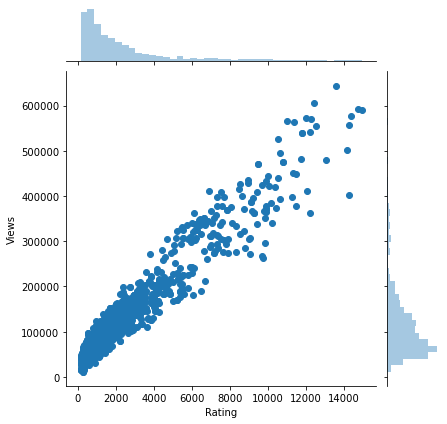

In [13]:
# Зависимость просмотров и рейтинга

sns.jointplot(df_num['Rating'], df_num['Views'])

### Визуализация после понижения размерности

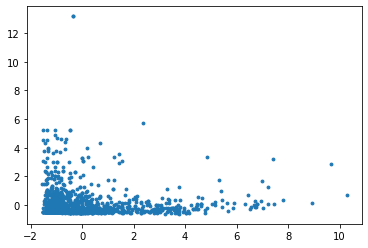

In [36]:
# визуализация всех 4х измерений

array = df_num.loc[:].dropna().values
array = scale(array)

pca = PCA(n_components=2)
res_pca4 = pca.fit_transform(array)

plt.scatter(res_pca4[:,0], res_pca4[:,1], s = 8)
plt.show()

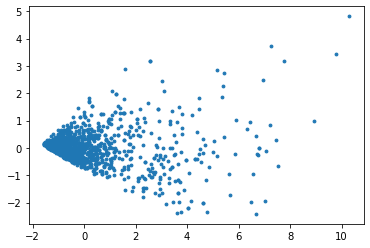

In [38]:
df_num3 = df_num[['Views','Rating','AmountComments']]

array = df_num3.loc[:].dropna().values
array = scale(array)

pca = PCA(n_components=2)
res_pca3 = pca.fit_transform(array)

plt.scatter(res_pca3[:,0], res_pca3[:,1], s = 8)
plt.show()

## Анализ на аномалии

In [33]:
def anomaly_visualization(anomaly_mas, res_pca):
    for i in range(len(df_num.dropna())):
        if (anomaly_mas[i] == 0):
            plt.scatter(res_pca[i,0], res_pca[i,1], s = 8, c = 'b')
        else:
            plt.scatter(res_pca[i,0], res_pca[i,1], s = 8, c = 'r')

    plt.show()

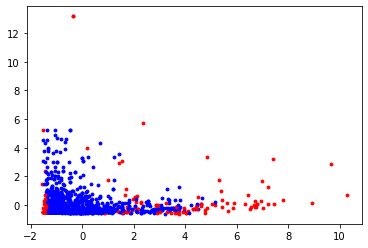

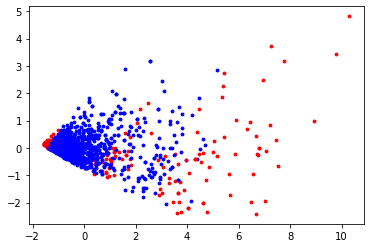

In [35]:
# С помощью алгоритма OneClassSVM

# Все данные
svm = OneClassSVM(nu=0.1)
svm.fit(df_num.dropna())

svm_prediction = svm.predict(df_num.dropna())
svm_prediction[svm_prediction == 1] = 0
svm_prediction[svm_prediction == -1] = 1

anomaly_visualization(svm_prediction, res_pca4)

# Без длины поста

svm = OneClassSVM(nu=0.1)
svm.fit(df_num3.dropna())

svm_prediction = svm.predict(df_num3.dropna())
svm_prediction[svm_prediction == 1] = 0
svm_prediction[svm_prediction == -1] = 1

anomaly_visualization(svm_prediction, res_pca3)

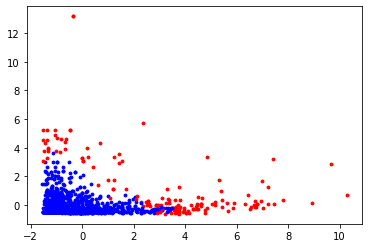

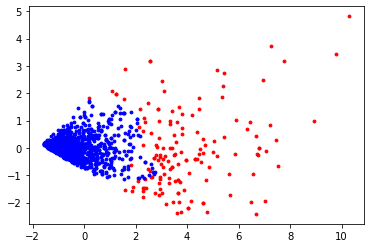

In [40]:
# С помощью алгоритма Isolation Forest

# Все данные
iso_forest = IsolationForest(n_estimators=100, contamination=0.1)
iso_forest.fit(df_num.dropna())

iso_forest_prediction = iso_forest.predict(df_num.dropna())
iso_forest_prediction[iso_forest_prediction == 1] = 0
iso_forest_prediction[iso_forest_prediction == -1] = 1

anomaly_visualization(iso_forest_prediction, res_pca4)

# Без длины поста

iso_forest = IsolationForest(n_estimators=100, contamination=0.1)
iso_forest.fit(df_num3.dropna())

iso_forest_prediction = iso_forest.predict(df_num3.dropna())
iso_forest_prediction[iso_forest_prediction == 1] = 0
iso_forest_prediction[iso_forest_prediction == -1] = 1

anomaly_visualization(iso_forest_prediction, res_pca3)

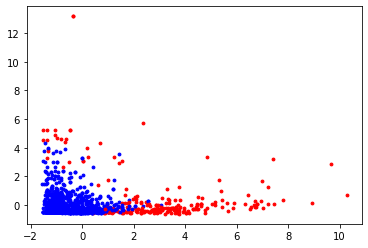

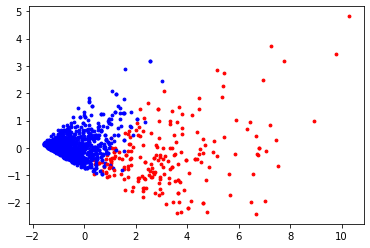

In [41]:
# С помощью алгоритма DBSCAN

# Все данные
clustering = DBSCAN(eps=2900, min_samples=5).fit(df_num.dropna())
anomaly_visualization(clustering.labels_, res_pca4)

# Без длины поста
clustering = DBSCAN(eps=2900, min_samples=5).fit(df_num3.dropna())
anomaly_visualization(clustering.labels_, res_pca3)

### Парные диаграммы рассеивания

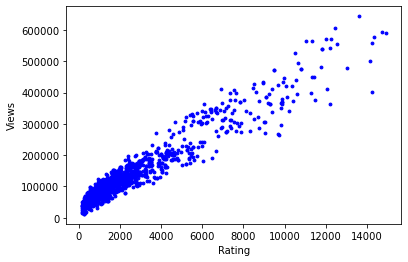

In [42]:
plt.scatter(df_num['Rating'], df_num['Views'], s = 8, c = 'b')
plt.xlabel('Rating')
plt.ylabel('Views')
plt.show()

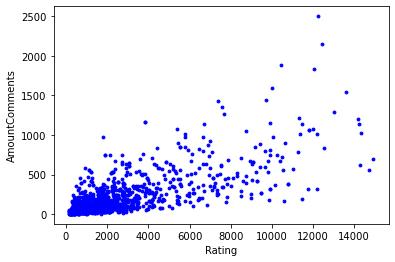

In [43]:
plt.scatter(df_num['Rating'], df_num['AmountComments'], s = 8, c = 'b')
plt.xlabel('Rating')
plt.ylabel('AmountComments')
plt.show()

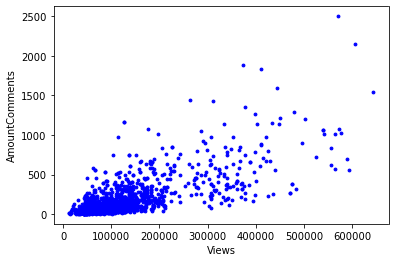

In [44]:
plt.scatter(df_num['Views'], df_num['AmountComments'], s = 8, c = 'b')
plt.xlabel('Views')
plt.ylabel('AmountComments')
plt.show()

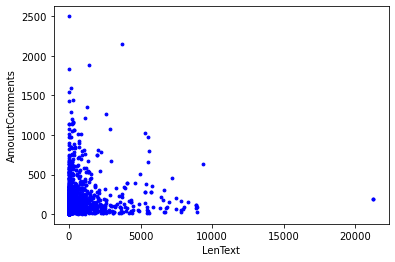

In [45]:
plt.scatter(df_num['LenText'], df_num['AmountComments'], s = 8, c = 'b')
plt.xlabel('LenText')
plt.ylabel('AmountComments')
plt.show()

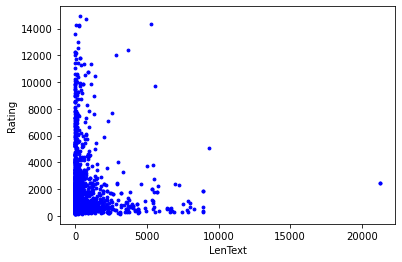

In [46]:
plt.scatter(df_num['LenText'], df_num['Rating'], s = 8, c = 'b')
plt.xlabel('LenText')
plt.ylabel('Rating')
plt.show()

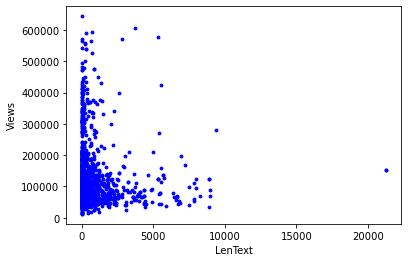

In [47]:
plt.scatter(df_num['LenText'], df_num['Views'], s = 8, c = 'b')
plt.xlabel('LenText')
plt.ylabel('Views')
plt.show()